In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [2]:
riders = pd.read_csv("data/Riders.csv")
riders.head()

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [3]:
sample = pd.read_csv("data/SampleSubmission.csv")
sample.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                        567.0
1  Order_No_12736                       4903.0
2    Order_No_768                       5649.0
3  Order_No_15332                          NaN
4  Order_No_21373                          NaN

In [4]:
test = pd.read_csv("data/Test.csv")
test.head()

Order No       User Id Vehicle Type  Platform Type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   
2    Order_No_768  User_Id_2154         Bike              3   
3  Order_No_15332  User_Id_2910         Bike              3   
4  Order_No_21373  User_Id_1205         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                        27   
1             Business                        17   
2             Business                        27   
3             Business                        17   
4             Business                        11   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             3       4:44:10 PM                           27   
1                             5      12:57:35 PM                           17   
2                             4      11:08:14 AM                           27   
3                             1       1:51:35 PM                           17   
4                             2      11:30:28 AM                           11   

   Confirmation - Weekday (Mo = 1)  ... Pickup - Weekday (Mo = 1)  \
0                                3  ...                         3   
1                                5  ...                         5   
2                                4  ...                         4   
3                                1  ...                         1   
4                                2  ...                         2   

   Pickup - Time  Distance (KM) Temperature  Precipitation in millimeters  \
0     5:06:47 PM              8         NaN                           NaN   
1     1:25:37 PM              5         NaN                           NaN   
2    11:57:54 AM              5        22.8                           NaN   
3     2:16:52 PM              5        24.5                           NaN   
4    11:56:04 AM              6        24.4                           NaN   

   Pickup Lat Pickup Long  Destination Lat  Destination Long      Rider Id  
0   -1.333275   36.870815        -1.305249         36.822390  Rider_Id_192  
1   -1.272639   36.794723        -1.277007         36.823907  Rider_Id_868  
2   -1.290894   36.822971        -1.276574         36.851365   Rider_Id_26  
3   -1.290503   36.809646        -1.303382         36.790658  Rider_Id_685  
4   -1.281081   36.814423        -1.266467         36.792161  Rider_Id_858  

[5 rows x 25 columns]

In [5]:
test.shape

(7068, 25)

In [6]:
test.dtypes

Order No                                 object
User Id                                  object
Vehicle Type                             object
Platform Type                             int64
Personal or Business                     object
Placement - Day of Month                  int64
Placement - Weekday (Mo = 1)              int64
Placement - Time                         object
Confirmation - Day of Month               int64
Confirmation - Weekday (Mo = 1)           int64
Confirmation - Time                      object
Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Weekday (Mo = 1)      int64
Arrival at Pickup - Time                 object
Pickup - Day of Month                     int64
Pickup - Weekday (Mo = 1)                 int64
Pickup - Time                            object
Distance (KM)                             int64
Temperature                             float64
Precipitation in millimeters            float64
Pickup Lat                              

In [7]:
test = test.drop_duplicates()

In [8]:
# Renaming columns
test.rename(columns={
    "Order No": "order_id",
    "User Id": "user_id",
    "Vehicle Type": "vehicle",
    "Platform Type": "platform",
    "Personal or Business": "personal_or_business",
    "Placement - Day of Month": "placement_date",
    "Placement - Weekday (Mo = 1)": "placement_weekday",
    "Placement - Time": "placement_time",
    "Confirmation - Day of Month": "confirm_date",
    "Confirmation - Weekday (Mo = 1)": "confirm_weekday",
    "Confirmation - Time": "confirm_time",
    "Arrival at Pickup - Day of Month": "arrival_pickup_date",
    "Arrival at Pickup - Weekday (Mo = 1)": "arrive_pickup_weekday",
    "Arrival at Pickup - Time": "arrive_time",
    "Pickup - Day of Month": "pickup_date",
    "Pickup - Weekday (Mo = 1)": "pickup_weekday",
    "Pickup - Time": "pickup_time",
    "Arrival at Destination - Day of Month": "arrival_dest_date",
    "Arrival at Destination - Weekday (Mo = 1)": "arrival_dest_weekday",
    "Arrival at Destination - Time": "arrival_dest_time",
    "Distance (KM)": "distance",
    "Temperature": "temperature",
    "Precipitation in millimeters": "precipitation",
    "Pickup Lat": "pickup_lat",
    "Pickup Long": "pickup_long",
    "Destination Lat": "dest_lat",
    "Destination Long": "dest_long",
    "Rider Id": "rider_id",
    "Time from Pickup to Arrival": "pickup_to_arrival_time"
}, inplace=True)

In [9]:
test = test.astype({"vehicle": "category", 
                      "platform": "category", 
                      "personal_or_business": "category"})

In [10]:
test["order_id"] = test["order_id"].str.replace("Order_No_", "").astype(int)
test["user_id"] = test["user_id"].str.replace("User_Id_", "").astype(int)
test["rider_id"] = test["rider_id"].str.replace("Rider_Id_", "").astype(int)

<AxesSubplot:>

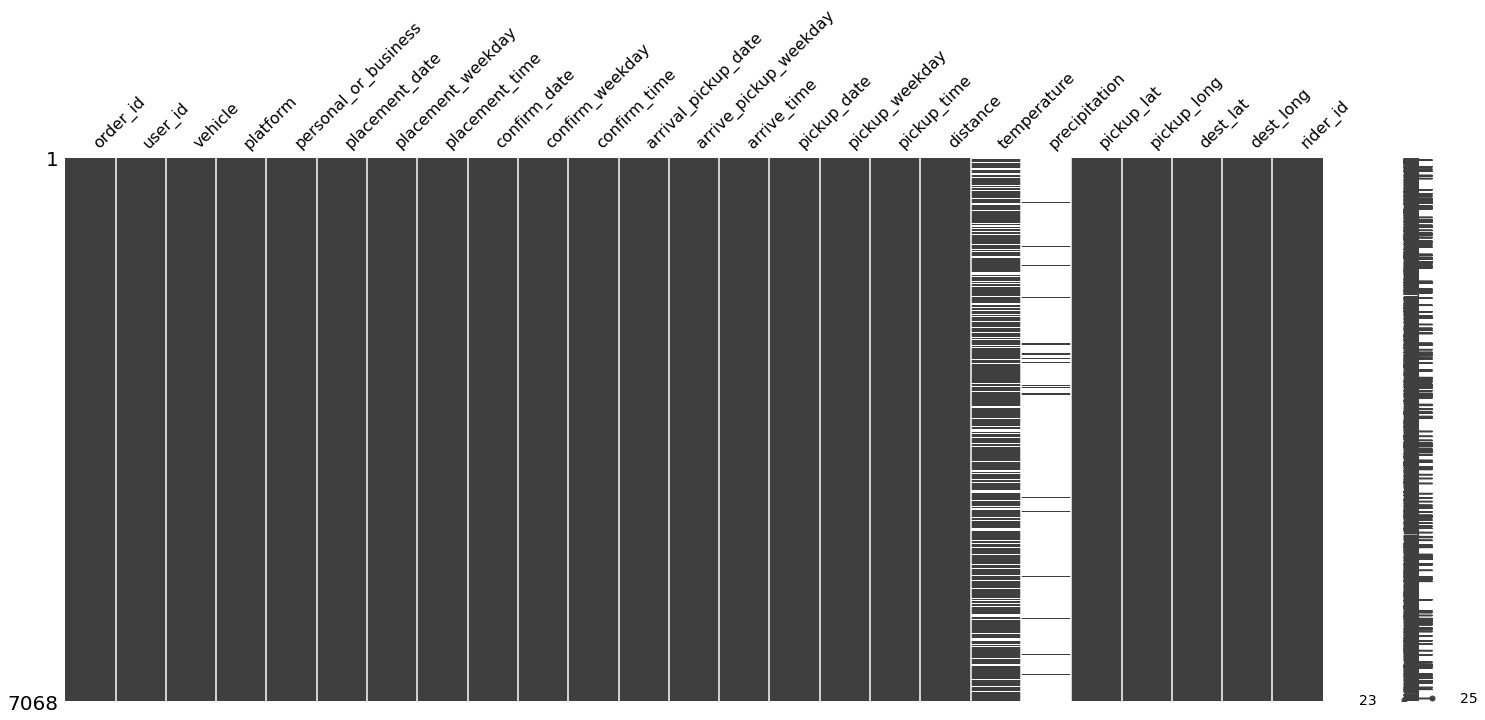

In [11]:
msno.matrix(test)

In [12]:
test.drop(columns="precipitation", inplace=True)
# Precipitation is messed up

In [13]:
test.temperature.fillna(test.temperature.mean(), inplace=True)
# Temperature is mostly ok

In [14]:
test.head()

order_id  user_id vehicle platform personal_or_business  placement_date  \
0     19248     3355    Bike        3             Business              27   
1     12736     3647    Bike        3             Business              17   
2       768     2154    Bike        3             Business              27   
3     15332     2910    Bike        3             Business              17   
4     21373     1205    Bike        3             Business              11   

   placement_weekday placement_time  confirm_date  confirm_weekday  ...  \
0                  3     4:44:10 PM            27                3  ...   
1                  5    12:57:35 PM            17                5  ...   
2                  4    11:08:14 AM            27                4  ...   
3                  1     1:51:35 PM            17                1  ...   
4                  2    11:30:28 AM            11                2  ...   

  pickup_date  pickup_weekday  pickup_time distance  temperature  pickup_lat  \
0          27               3   5:06:47 PM        8     23.24612   -1.333275   
1          17               5   1:25:37 PM        5     23.24612   -1.272639   
2          27               4  11:57:54 AM        5     22.80000   -1.290894   
3          17               1   2:16:52 PM        5     24.50000   -1.290503   
4          11               2  11:56:04 AM        6     24.40000   -1.281081   

  pickup_long  dest_lat  dest_long  rider_id  
0   36.870815 -1.305249  36.822390       192  
1   36.794723 -1.277007  36.823907       868  
2   36.822971 -1.276574  36.851365        26  
3   36.809646 -1.303382  36.790658       685  
4   36.814423 -1.266467  36.792161       858  

[5 rows x 24 columns]

In [15]:
test.groupby('platform').distance.mean()

platform
1    9.451477
2    8.937500
3    9.489776
4    8.666667
Name: distance, dtype: float64

In [16]:
test.groupby('vehicle').distance.mean()

vehicle
Bike    9.45897
Name: distance, dtype: float64

In [17]:
bool_2 = test['placement_date'] == test['arrival_pickup_date']
test[~bool_2]

Empty DataFrame
Columns: [order_id, user_id, vehicle, platform, personal_or_business, placement_date, placement_weekday, placement_time, confirm_date, confirm_weekday, confirm_time, arrival_pickup_date, arrive_pickup_weekday, arrive_time, pickup_date, pickup_weekday, pickup_time, distance, temperature, pickup_lat, pickup_long, dest_lat, dest_long, rider_id]
Index: []

[0 rows x 24 columns]

In [18]:
test.to_pickle("test.pkl")

In [19]:
def convert_time(time):
    #time is in the form "XX:XX:XX AM/PM" or "X:XX:XX AM/PM". Convert it to a seconds format.
    #for example, "1:00:00 AM" is converted to 3600. "1:00:00 PM" is converted to 46800.
    
    time_one_twelve = time[:-3] 
    if time_one_twelve[1] == ":":
        time_one_twelve = "0" + time_one_twelve[:]
        print(time_one_twelve)
    #this is the part consisting of "XX:XX:XX"
    
    ampm = time[-2:] #this is the part consisting of "AM/PM"
    
    if ampm == 'AM':
        return convert_am_time(time_one_twelve)
    elif ampm == 'PM':
        return convert_am_time(time_one_twelve) + 3600 * 12
    else:
        return -1 #this should never happen when your input is valid, it's to deal with naughty inputs

In [20]:
def convert_am_time(time_one_twelve):
    hour_string = time_one_twelve[:2]
    minute_string = time_one_twelve[3:5]
    second_string = time_one_twelve[6:8]
    
    hour_int = convert_str_to_int(hour_string)
    minute_int = convert_str_to_int(minute_string)
    second_int = convert_str_to_int(second_string)
    
    return 3600 * hour_int + 60 * minute_int + second_int

In [21]:
def convert_str_to_int(string):
    # Precondition: string has length 2 and should only consist of digits
    if string[0] == "0":
        return int(string[1])
    else:
        if string == "12":
            return 0
        return int(string)

In [22]:
x = "04:44:10 PM"
convert_time("dsbajkdsa")

-1

In [23]:
test['placement_time'] = test.apply(lambda x: convert_time(x.placement_time), axis=1)

04:44:10
01:51:35
06:29:29
09:53:29
08:51:13
08:58:21
04:28:28
09:22:04
03:53:01
02:04:28
03:54:08
02:47:50
08:47:43
08:35:55
01:55:29
09:36:32
01:51:52
08:53:08
09:53:04
02:34:07
09:59:28
01:46:56
01:17:26
03:07:28
08:36:14
02:41:15
02:11:20
09:45:07
02:50:26
01:39:12
08:30:03
04:08:56
02:09:13
02:33:09
03:43:32
02:49:13
03:06:35
09:19:31
08:07:33
02:47:43
03:11:06
09:23:23
01:26:22
02:33:12
02:04:56
01:19:22
09:19:46
04:12:16
03:12:05
04:20:55
04:11:35
08:54:17
04:35:21
02:29:33
01:18:14
03:58:05
03:33:16
03:28:16
03:33:54
09:33:50
04:05:07
08:58:48
03:11:56
09:28:41
03:18:19
01:47:30
09:34:28
03:13:22
07:33:58
02:27:48
09:25:42
01:34:19
01:38:42
01:00:58
08:24:44
09:46:28
02:31:31
05:12:55
02:35:38
09:30:28
06:45:29
02:23:01
02:45:23
09:48:57
01:17:12
03:27:50
03:51:40
08:51:44
03:31:16
09:31:44
08:53:37
03:08:15
01:06:05
03:11:48
02:43:21
05:17:28
03:12:46
04:51:40
02:37:31
04:05:23
03:35:37
04:55:54
02:06:58
02:42:50
03:13:36
09:53:30
01:08:41
01:34:02
03:08:07
02:09:10
01:36:10
0

09:05:17
02:21:22
02:46:58
02:24:05
09:57:27
03:17:37
09:04:12
09:37:15
08:31:51
02:27:53
09:21:51
05:59:14
02:33:55
09:46:56
01:53:10
02:45:06
09:08:55
08:52:25
03:31:42
02:44:57
09:13:49
04:09:47
02:43:35
02:37:54
02:47:15
02:42:38
09:23:59
09:44:36
03:22:08
03:24:13
04:38:13
02:07:26
02:25:54
07:31:21
08:05:12
03:15:28
03:36:55
08:56:08
09:28:50
03:15:26
02:53:50
02:37:18
04:15:42
04:11:53
01:14:13
02:31:34
08:41:38
01:37:33
09:08:05
07:00:48
02:41:04
09:34:03
07:40:02
02:20:22
03:48:31
02:15:21
07:51:58
02:24:02
01:25:53
01:36:22
04:36:47
03:54:36
03:11:52
01:27:02
04:06:43
01:14:30
03:45:23
04:24:03
06:55:46
08:45:45
05:03:46
04:35:30
09:11:06
02:24:12
01:45:47
04:27:07
03:09:40
02:19:39
05:58:58
03:01:16
01:49:15
03:01:29
02:50:32
09:50:24
04:38:30
01:05:22
02:32:58
09:34:14
03:07:36
01:59:15
01:35:28
01:13:42
08:35:37
02:54:58
02:43:19
09:34:55
04:18:55
08:55:03
02:48:06
03:22:30
01:34:26
04:43:31
02:31:48
05:55:21
02:28:15
03:36:54
01:40:43
02:51:09
09:21:05
01:31:49
08:45:54
0

09:35:32
01:51:35
03:00:21
03:31:21
01:04:06
04:32:28
02:12:00
08:21:56
09:58:41
03:45:43
09:37:19
02:18:06
04:10:07
01:15:31
09:42:35
04:36:16
09:08:57
03:05:15
07:48:53
09:21:43
01:43:19
01:20:13
01:31:37
09:38:58
03:07:00
03:34:49
09:09:22
02:23:20
04:20:42
01:53:56
01:22:26
03:16:53
03:58:52
01:24:54
01:46:13
02:20:48
09:49:58
03:47:26
02:06:42
02:36:06
09:59:11
09:38:43
01:39:04
04:10:08
02:19:37
02:36:11
02:05:09
03:26:23
01:32:16
03:48:48
09:17:59
03:52:03
03:57:34
04:43:57
04:32:30
02:40:37
03:33:25
09:45:01
06:29:16
01:44:51
09:45:51
01:51:25
03:59:07
07:54:37
01:15:38
03:15:48
01:43:31
02:02:34
03:00:14
03:57:53
02:46:11
04:09:56
01:55:32
04:39:17
03:41:56
09:41:34
02:20:35
07:32:27
03:37:28
01:58:14
01:40:31
06:11:10
01:05:32
01:34:50
08:35:35
09:20:21
09:47:02
01:29:16
04:35:30
01:17:57
02:30:39
08:04:03
09:17:41
08:29:20
01:04:29
09:59:07
01:58:49
03:54:34
03:37:37
01:51:15
01:31:02
03:10:45
01:06:21
09:49:16
09:45:34
06:44:24
02:34:15
02:01:55
01:18:38
09:29:30
06:14:40
0

06:35:13
01:24:25
09:37:52
09:31:05
02:00:50
09:41:33
03:06:18
01:01:22
08:00:06
09:29:04
02:09:50
03:56:49
02:34:05
08:59:36
01:58:40
04:57:09
02:59:04
03:17:51
09:45:44
04:43:30
03:32:56
01:23:46
08:56:08
09:43:05
04:58:50
09:37:42
05:26:03
07:55:58
02:26:37
03:17:05
05:06:21
02:10:12
03:06:39
08:17:41
02:27:03
01:40:25
02:03:56
03:46:31
03:03:24
03:35:56
02:23:49
09:13:54
02:30:55
03:38:07
07:35:03
09:16:54
03:37:35
04:27:54
09:28:15
01:31:23
08:48:49
02:51:45
07:24:28
03:31:21
03:32:42
01:22:45
02:12:16
02:33:49
04:55:25
03:39:10
08:36:03
02:32:32
03:19:42
04:08:15
01:09:36
03:33:41
01:48:08
03:46:35
02:38:17
04:00:07
04:24:24
04:53:39
03:22:41
01:28:56
03:16:20
04:25:34
03:03:08
03:59:39
02:47:18
09:08:38
02:54:39
02:57:07
08:37:42
05:30:48
04:21:24
09:29:47
01:59:20
05:00:56
05:27:17
02:51:44
04:10:20
05:30:02
09:19:41
08:56:50
02:14:08
03:44:58
02:41:39
09:35:21
07:51:25
09:16:55
02:12:36
05:42:18
09:52:59
09:51:26
02:07:48
03:35:35
03:09:30
04:41:04
02:48:56
03:00:07
02:28:31
0

In [24]:
test.dtypes

order_id                    int64
user_id                     int64
vehicle                  category
platform                 category
personal_or_business     category
placement_date              int64
placement_weekday           int64
placement_time              int64
confirm_date                int64
confirm_weekday             int64
confirm_time               object
arrival_pickup_date         int64
arrive_pickup_weekday       int64
arrive_time                object
pickup_date                 int64
pickup_weekday              int64
pickup_time                object
distance                    int64
temperature               float64
pickup_lat                float64
pickup_long               float64
dest_lat                  float64
dest_long                 float64
rider_id                    int64
dtype: object

In [25]:
test['pickup_time'] = test.apply(lambda x: convert_time(x.pickup_time), axis=1)

05:06:47
01:25:37
02:16:52
06:39:02
08:58:53
09:30:35
04:44:01
04:03:53
02:30:47
04:00:47
03:06:39
09:07:12
09:25:37
02:02:24
02:06:33
03:15:53
02:12:21
02:34:27
03:32:01
09:10:43
01:13:55
01:25:09
01:16:16
03:15:33
02:27:38
09:56:59
03:07:38
02:00:46
08:46:05
04:58:12
01:48:32
02:28:59
01:39:15
02:46:02
03:53:15
03:40:13
03:19:54
09:53:00
08:26:35
03:02:13
03:44:16
01:38:31
03:46:42
03:35:15
01:51:24
09:47:57
04:37:55
03:29:15
04:57:54
04:27:08
09:49:51
04:46:59
02:42:59
01:41:36
04:41:52
03:50:49
03:37:38
04:39:48
04:24:15
03:43:26
01:49:21
09:40:38
04:11:47
02:00:02
01:18:32
04:19:58
08:10:07
02:47:51
01:44:43
09:55:34
01:51:29
02:21:12
01:19:05
08:57:40
03:45:34
06:10:33
02:37:40
09:47:54
02:01:06
07:20:23
02:23:28
02:49:05
01:17:09
03:17:29
01:41:37
03:56:09
04:21:45
09:23:58
03:49:25
09:46:16
09:08:15
03:47:47
01:45:15
03:29:26
03:17:48
05:30:21
04:15:06
05:58:19
03:05:01
04:31:02
04:11:21
05:04:52
02:29:17
03:17:37
03:48:34
01:23:42
02:37:49
03:35:37
02:29:58
02:09:06
01:40:22
0

01:19:20
09:07:33
01:29:12
01:29:16
09:28:19
02:29:24
09:18:39
04:12:47
01:46:21
01:02:57
03:26:35
02:50:33
02:30:44
02:14:38
04:41:23
01:52:14
03:06:03
07:14:56
04:07:35
02:59:25
09:21:37
01:44:54
02:15:20
09:51:01
04:35:25
05:47:25
02:39:54
01:17:23
03:03:26
02:12:52
02:18:27
04:45:39
01:02:46
01:24:33
09:42:06
03:33:26
04:45:45
03:30:40
03:38:51
05:05:34
08:29:18
09:03:16
07:57:57
09:04:19
06:13:46
01:44:58
01:21:03
09:21:58
06:25:48
02:38:47
03:43:15
02:07:06
09:45:00
02:08:16
09:34:38
03:28:57
03:23:54
02:33:14
04:24:04
09:22:32
01:25:19
02:07:22
01:38:22
03:45:18
03:08:39
03:57:19
01:22:44
01:48:45
04:37:56
09:50:20
03:21:43
03:19:35
01:16:23
09:46:35
01:35:33
02:34:33
01:17:45
07:06:07
04:07:31
04:42:16
09:26:24
01:22:11
04:08:32
01:42:19
08:29:38
03:32:24
04:11:53
02:24:47
02:45:30
01:55:17
03:04:04
04:49:13
04:03:33
06:26:26
02:47:01
04:40:16
03:19:11
04:48:24
01:38:20
03:11:25
03:02:28
04:25:29
04:47:05
04:51:07
02:28:19
04:01:00
04:38:14
01:16:03
09:38:33
08:33:08
09:37:54
0

04:14:46
04:11:14
02:25:48
04:18:21
09:29:01
03:34:15
07:21:28
02:14:03
02:52:11
01:40:19
02:14:35
08:23:10
03:51:13
04:56:20
02:48:45
04:54:36
03:55:52
03:51:01
09:25:31
03:40:30
09:50:53
04:52:10
03:35:22
01:39:50
03:34:15
03:09:30
09:58:33
09:48:11
02:37:02
01:22:37
03:37:21
09:43:31
02:48:04
01:40:34
03:45:37
04:02:25
09:44:38
01:23:15
05:05:17
05:36:05
04:55:23
05:46:46
02:57:29
03:34:30
04:37:17
03:59:51
01:56:24
01:23:44
02:28:13
08:59:35
04:36:43
03:49:51
09:37:48
02:41:05
04:14:36
03:29:57
04:32:54
03:11:58
09:04:14
01:04:12
02:22:31
01:50:31
01:03:19
04:42:16
04:38:41
04:45:11
01:56:56
02:37:49
03:13:43
03:26:14
06:51:22
01:00:57
04:02:03
03:39:15
05:06:38
01:16:08
04:58:34
07:46:26
03:00:35
01:08:05
09:04:50
01:53:34
01:48:09
09:15:51
03:50:51
01:44:28
01:55:25
03:21:38
04:08:16
01:21:44
02:41:38
02:55:38
03:09:23
04:32:42
09:48:59
08:22:20
03:18:12
02:43:38
03:22:58
04:36:39
03:12:44
03:58:24
07:59:47
03:03:19
01:51:41
02:45:58
01:29:59
09:50:54
02:18:15
02:19:11
01:27:29
0

02:54:07
02:44:58
04:46:37
03:40:04
01:09:37
03:47:53
01:29:01
01:05:28
03:45:12
08:34:21
09:48:40
03:20:42
04:39:12
01:26:25
02:09:24
09:21:40
04:35:48
04:52:15
08:22:49
02:28:26
02:47:00
05:26:21
04:56:58
01:18:43
02:16:22
03:07:13
03:25:46
01:56:03
03:27:36
03:36:12
04:48:39
09:47:00
02:46:12
02:16:31
01:06:24
04:08:07
04:16:14
04:44:41
08:52:54
04:17:49
09:52:47
02:11:26
01:44:01
03:34:18
01:42:31
05:53:57
02:18:09
02:44:58
03:40:05
07:57:37
09:48:38
05:13:47
01:29:21
06:04:24
02:12:22
04:10:08
02:32:39
09:40:57
02:16:10
03:39:50
03:28:41
03:28:20
04:06:17
03:14:41
03:23:42
04:54:02
09:36:27
03:51:12
08:55:24
09:46:59
05:24:00
06:09:21
06:12:21
03:49:29
01:23:42
09:35:45
02:55:49
04:57:55
04:01:33
05:02:25
05:31:23
02:05:28
03:22:16
02:01:38
09:25:43
05:53:34
03:14:59
02:01:23
03:22:37
01:59:02
07:01:33
03:04:10
02:36:29
02:43:43
03:15:51
04:20:27
02:34:01
04:12:27
01:00:06
09:10:29
02:33:08
03:30:08
01:24:32
04:48:51
06:54:14
08:51:55
03:24:53
03:12:09
02:03:37
04:48:11
03:46:45
0

In [26]:
test['confirm_time'] = test.apply(lambda x: convert_time(x.confirm_time), axis=1)

04:44:29
01:53:27
06:29:33
09:53:50
08:52:46
08:58:40
04:29:22
09:23:03
03:54:41
02:04:36
03:57:45
02:57:32
08:48:06
08:38:41
01:56:48
09:36:54
01:52:38
08:53:08
09:53:16
02:46:21
09:59:43
01:57:08
01:25:20
03:07:57
08:46:05
01:12:57
02:49:36
02:15:46
09:46:39
02:51:09
01:40:00
08:30:27
04:12:39
02:11:15
01:18:38
02:37:22
03:44:09
02:54:58
03:10:01
09:21:27
08:08:36
02:47:52
03:13:51
01:28:17
03:13:58
02:05:21
01:20:04
09:20:51
04:13:08
03:12:33
04:21:45
04:12:11
09:01:25
04:36:24
02:30:51
01:19:10
03:58:37
03:34:43
03:28:29
03:42:18
09:36:37
04:06:42
09:02:54
03:15:21
09:29:33
03:24:19
01:47:54
09:40:08
03:38:57
07:35:05
02:28:23
01:17:36
09:26:26
01:38:12
01:46:50
01:02:28
08:32:04
09:46:40
02:57:54
05:57:22
02:35:55
09:30:34
01:01:18
06:47:02
02:25:02
02:47:18
09:51:41
01:20:36
03:29:21
03:57:55
08:52:04
03:32:19
09:32:41
08:54:12
03:08:22
01:26:58
03:12:05
02:47:16
05:19:08
03:13:16
05:40:34
02:45:07
04:09:36
03:43:43
05:00:43
02:09:14
02:46:00
03:18:27
01:09:24
01:54:16
03:12:51
0

01:53:48
04:15:40
01:41:17
02:17:53
06:58:41
03:43:58
02:25:48
08:43:49
01:05:49
01:29:23
09:39:02
04:11:05
05:04:01
02:02:19
01:05:01
02:28:50
01:55:17
01:43:46
04:18:35
01:23:10
09:27:45
03:24:45
09:47:13
04:35:39
03:12:42
03:18:03
04:35:27
07:58:18
08:26:22
09:40:34
07:37:42
08:56:23
06:07:11
01:32:01
01:12:07
09:00:39
05:24:20
02:04:40
03:20:43
01:18:30
09:28:11
01:39:25
09:05:38
03:17:44
03:05:12
02:18:41
04:15:41
09:17:11
01:07:38
01:09:47
03:11:31
02:46:01
03:18:19
01:26:49
04:05:15
09:17:49
02:53:42
02:59:14
09:45:16
09:18:41
01:21:07
02:12:01
06:41:35
03:28:11
04:17:36
09:03:23
09:30:53
03:33:29
07:41:52
03:02:17
03:58:44
01:37:06
02:33:02
01:33:26
02:26:24
04:34:14
03:04:57
05:51:07
02:22:45
04:24:22
03:08:04
04:06:04
01:17:44
02:37:33
02:16:30
04:04:51
04:34:30
04:16:36
02:26:17
09:33:41
03:12:26
04:13:48
08:58:12
08:22:30
09:01:51
09:45:22
01:22:23
01:14:56
03:13:07
06:05:16
02:29:10
02:42:30
05:13:58
03:20:54
03:15:04
04:46:11
05:05:02
02:29:58
08:08:58
03:16:47
03:58:20
0

02:41:18
09:50:47
09:33:40
03:58:14
05:10:44
03:26:10
01:35:58
03:05:09
01:40:51
09:40:03
02:31:21
01:10:20
01:13:48
03:30:37
09:56:03
03:10:53
05:01:55
02:59:03
01:50:56
04:02:48
02:56:36
05:06:37
09:56:12
03:03:52
09:55:56
03:02:55
04:34:34
02:00:25
01:19:38
02:29:04
02:31:46
09:34:52
04:48:03
09:59:32
03:09:19
03:17:13
02:08:50
01:04:33
03:41:18
04:30:14
02:39:04
03:37:17
01:25:40
02:09:03
03:50:06
02:24:08
02:27:38
09:02:20
01:50:48
09:21:00
04:55:23
06:02:54
01:38:18
08:35:02
01:58:57
04:00:16
03:57:11
08:49:13
04:08:41
02:45:22
08:40:48
02:37:03
01:36:26
01:22:31
03:02:38
01:37:51
04:47:19
01:35:54
09:48:00
09:43:17
03:37:00
01:31:56
03:46:20
04:21:06
08:12:24
04:58:57
09:02:34
08:55:37
01:11:08
09:17:48
04:55:45
02:46:13
03:17:57
08:22:15
08:43:09
02:11:06
09:22:27
09:47:50
09:10:25
02:49:41
08:39:15
09:34:01
01:04:53
03:29:22
03:44:03
02:15:36
03:57:44
09:13:27
03:19:07
06:55:50
02:38:48
01:30:16
01:51:36
08:09:46
03:24:15
04:10:34
02:31:59
04:38:52
03:13:45
03:10:24
09:04:13
0

09:05:17
09:29:04
03:20:14
05:17:04
03:10:55
08:41:23
09:58:35
05:10:23
03:30:05
02:12:14
03:15:26
08:20:52
02:53:55
04:58:33
02:40:38
03:15:42
09:44:09
04:37:47
04:38:57
01:21:55
09:03:58
02:51:20
01:55:20
02:09:49
09:53:36
09:49:08
02:05:24
04:10:27
03:28:44
03:29:20
03:27:29
09:31:49
08:15:00
09:30:03
03:07:35
04:24:50
01:09:42
01:56:24
08:48:26
09:36:21
04:21:38
04:08:35
08:16:07
02:09:17
02:19:52
05:15:10
04:48:17
01:03:04
01:49:07
01:56:02
03:02:35
01:46:15
03:09:15
09:52:20
03:19:50
04:44:05
09:21:15
02:25:38
03:38:56
03:51:20
03:34:19
08:22:00
04:00:42
09:04:01
01:30:13
02:47:26
01:28:15
05:43:14
01:59:59
02:33:45
03:18:58
07:42:24
09:20:34
04:04:20
05:41:02
01:55:33
09:46:49
03:55:43
02:12:44
08:57:08
01:59:01
03:32:25
02:46:49
02:57:19
03:55:54
02:48:43
03:13:16
04:28:44
09:31:58
03:27:39
08:40:55
09:22:27
05:12:48
05:57:49
05:43:10
03:30:56
08:49:32
02:31:40
04:19:01
03:24:07
04:42:45
05:09:07
01:43:40
02:09:38
01:36:42
09:05:51
05:02:44
02:58:10
01:21:27
03:13:08
01:48:53
0

03:35:05
07:06:52
02:11:14
03:07:04
01:33:15
03:14:03
02:45:05
04:04:48
03:56:53
09:55:00
09:15:58
05:56:29
08:56:29
03:00:57
02:45:36
03:19:45
03:43:40


In [27]:
test['arrive_time'] = test.apply(lambda x: convert_time(x.arrive_time), axis=1)

04:53:04
01:20:27
02:02:41
06:36:46
09:56:31
08:57:45
09:27:17
04:42:33
09:28:17
04:00:13
02:12:18
03:58:28
02:58:00
08:56:33
09:23:07
02:01:19
09:41:12
01:59:14
08:53:25
09:53:21
03:09:56
02:04:28
02:14:45
03:08:11
09:02:44
01:03:20
01:13:47
03:10:36
02:23:52
09:49:18
03:00:55
01:55:26
08:39:01
04:48:56
02:26:30
01:33:59
02:44:15
03:49:18
03:11:21
03:16:05
09:48:13
08:14:42
02:59:44
03:25:37
01:31:22
03:26:32
03:13:04
01:30:07
09:42:57
04:23:06
03:13:04
04:48:51
04:19:17
09:46:42
04:39:03
02:39:51
01:35:19
04:36:37
03:43:57
03:28:47
04:37:07
04:21:44
03:31:57
09:37:13
04:00:14
01:58:10
01:10:56
09:58:46
04:03:15
07:50:37
02:29:01
01:37:43
09:39:00
01:47:32
02:20:04
01:14:02
08:45:48
09:52:28
03:37:47
06:08:46
02:36:33
09:44:49
01:38:01
07:04:31
01:22:16
02:46:02
01:06:06
03:11:47
01:35:29
03:34:02
04:10:43
09:22:10
03:43:58
09:43:05
09:04:53
03:08:31
01:42:31
03:20:42
03:09:26
05:19:25
03:14:18
05:51:49
02:46:22
04:18:31
03:49:25
05:01:07
02:24:13
03:09:21
03:43:29
01:17:33
02:13:54
0

01:26:39
02:25:55
01:11:53
06:56:53
03:39:19
04:31:04
09:22:48
09:33:26
03:33:33
01:12:21
08:26:13
03:15:33
04:06:45
01:47:15
02:34:56
01:37:04
02:52:33
04:42:54
03:40:36
05:55:14
02:33:09
04:38:09
03:17:20
04:24:50
01:36:32
03:05:48
02:52:25
04:18:05
04:43:09
04:26:00
02:26:27
03:48:34
04:33:16
01:09:05
09:17:24
08:29:03
09:30:21
01:31:39
01:21:51
03:40:38
06:14:31
02:46:15
02:42:33
05:19:28
03:27:09
03:17:42
05:04:05
05:32:21
02:41:22
08:14:22
03:16:50
04:14:50
03:45:46
02:58:50
04:04:45
02:44:43
06:22:33
02:49:33
01:32:19
03:16:08
04:48:47
01:44:43
07:34:27
01:52:51
03:20:26
02:25:33
06:58:54
09:32:48
03:55:08
08:54:43
09:59:45
04:20:36
01:25:12
09:32:27
02:18:57
04:24:04
04:21:31
02:30:04
03:34:49
02:47:34
02:16:33
03:31:25
02:22:50
01:08:33
01:45:45
02:44:57
02:01:11
09:22:09
04:29:15
05:43:40
02:04:40
02:36:10
04:26:44
02:43:27
07:52:52
06:20:40
04:00:59
01:48:45
02:37:21
02:57:49
01:19:36
05:18:49
01:12:01
09:03:02
02:44:30
08:35:58
02:40:49
03:30:25
08:35:13
01:21:10
01:41:39
0

01:09:25
03:09:22
01:04:35
01:35:49
03:19:08
04:47:33
03:19:40
09:36:14
01:17:53
01:26:31
08:39:37
03:35:16
08:21:24
04:53:57
01:12:21
03:31:40
09:17:57
01:12:21
09:07:57
03:36:29
07:58:54
01:15:13
01:35:14
04:55:02
05:49:34
03:43:49
09:42:21
07:49:27
05:22:00
01:28:01
02:34:28
03:57:54
02:55:59
08:34:40
05:17:56
01:56:18
02:30:38
02:38:24
09:34:56
01:41:08
06:02:33
09:22:35
02:58:36
03:49:32
04:17:28
02:00:22
01:58:00
03:33:17
05:33:38
01:04:29
02:46:42
09:37:23
04:02:23
05:26:58
03:33:45
02:13:45
03:42:12
01:51:06
09:53:40
02:31:34
01:35:03
01:21:39
03:39:52
03:25:28
05:06:56
03:11:50
02:06:37
04:08:08
03:18:03
05:30:18
09:56:17
03:22:38
03:15:53
04:42:00
02:11:04
01:30:26
02:38:06
02:38:26
09:44:56
04:56:43
09:59:55
03:12:24
03:41:14
02:15:25
01:18:58
03:50:34
04:42:52
02:46:14
03:52:12
01:27:16
02:17:17
04:09:05
02:42:29
02:39:09
09:08:18
02:36:59
09:27:49
05:07:04
06:15:37
01:46:20
08:43:29
02:39:35
04:12:20
04:05:23
08:52:10
04:48:14
02:59:50
08:44:13
02:49:18
01:42:43
01:36:06
0

04:14:53
03:18:33
03:11:49
03:20:11
03:51:57
01:23:26
01:08:11
09:43:22
09:17:28
04:14:00
02:14:50
01:07:43
01:37:24
01:09:31
04:52:28
04:32:29
05:37:53
06:08:21
02:48:55
05:00:13
09:49:15
04:14:02
04:03:30
03:42:15
03:02:59
03:31:19
09:14:09
01:21:52
03:55:51
03:51:04
07:12:38
02:18:49
09:50:03
06:06:58
03:35:58
03:16:15
01:05:27
03:03:52
02:23:17
09:14:12
03:39:48
09:26:42
01:56:31
09:46:25
01:25:05
04:03:16
01:19:17
09:48:16
04:44:51
01:03:27
09:59:28
05:43:56
08:34:16
02:12:13
03:01:38
05:35:02
01:30:32
09:20:03
09:32:17
01:16:55
01:24:00
03:27:28
01:46:49
02:55:45
03:23:31
02:34:22
03:29:56
04:41:36
04:15:19
02:50:59
01:42:19
04:08:22
01:15:59
01:23:53
08:48:50
01:31:39
02:57:36
01:37:48
03:26:21
02:16:19
06:01:15
01:04:27
09:20:34
03:46:46
02:28:14
02:40:04
01:12:16
01:15:11
03:32:31
03:06:13
09:53:16
02:29:55
03:07:55
05:46:59
02:00:05
02:43:18
01:03:47
01:52:49
09:48:29
09:08:09
02:29:33
03:56:39
08:59:09
03:48:03
03:34:57
04:08:42
04:36:37
09:17:45
08:59:47
05:34:00
04:11:55
0

01:47:28
01:02:45
08:54:45
05:03:37
05:36:09
09:27:02
05:44:49
02:54:30
08:43:41
01:57:49
02:00:08
04:18:17
09:58:17
06:19:40
04:35:28
03:35:59
07:16:52
02:18:08
03:31:26
01:39:05
03:17:25
02:58:21
04:05:02
04:14:11
01:02:05
09:22:08
06:30:12
08:56:38
03:18:37
03:00:15
03:40:47
03:58:05


In [28]:
test.dtypes

order_id                    int64
user_id                     int64
vehicle                  category
platform                 category
personal_or_business     category
placement_date              int64
placement_weekday           int64
placement_time              int64
confirm_date                int64
confirm_weekday             int64
confirm_time                int64
arrival_pickup_date         int64
arrive_pickup_weekday       int64
arrive_time                 int64
pickup_date                 int64
pickup_weekday              int64
pickup_time                 int64
distance                    int64
temperature               float64
pickup_lat                float64
pickup_long               float64
dest_lat                  float64
dest_long                 float64
rider_id                    int64
dtype: object

In [29]:
test.head()

order_id  user_id vehicle platform personal_or_business  placement_date  \
0     19248     3355    Bike        3             Business              27   
1     12736     3647    Bike        3             Business              17   
2       768     2154    Bike        3             Business              27   
3     15332     2910    Bike        3             Business              17   
4     21373     1205    Bike        3             Business              11   

   placement_weekday  placement_time  confirm_date  confirm_weekday  ...  \
0                  3           60250            27                3  ...   
1                  5           46655            17                5  ...   
2                  4           40094            27                4  ...   
3                  1           49895            17                1  ...   
4                  2           41428            11                2  ...   

   pickup_date  pickup_weekday  pickup_time  distance  temperature  \
0           27               3        61607         8     23.24612   
1           17               5        48337         5     23.24612   
2           27               4        43074         5     22.80000   
3           17               1        51412         5     24.50000   
4           11               2        42964         6     24.40000   

   pickup_lat  pickup_long  dest_lat  dest_long  rider_id  
0   -1.333275    36.870815 -1.305249  36.822390       192  
1   -1.272639    36.794723 -1.277007  36.823907       868  
2   -1.290894    36.822971 -1.276574  36.851365        26  
3   -1.290503    36.809646 -1.303382  36.790658       685  
4   -1.281081    36.814423 -1.266467  36.792161       858  

[5 rows x 24 columns]